# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


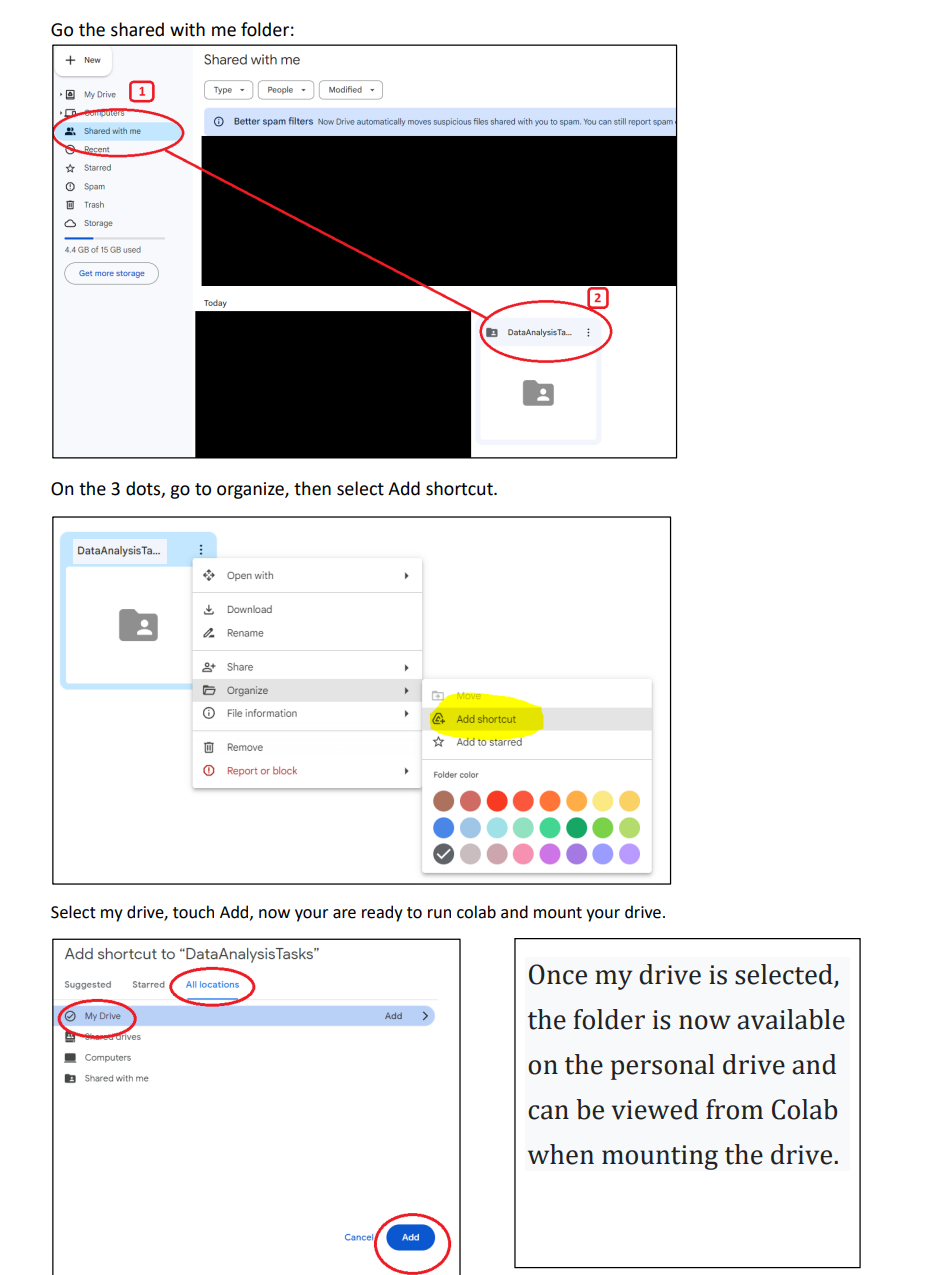

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [4]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [20]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DataTable, TableColumn, CustomJS, Dropdown
from bokeh.layouts import column

# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/apple_iphone_se.csv')

# Convert the DataFrame to a ColumnDataSource
source_all = ColumnDataSource(data)

# Create a histogram of ratings
hist, edges = np.histogram(data['Ratings'], bins=[1, 2, 3, 4, 5, 6])
source_hist = ColumnDataSource(data=dict(ratings=edges[:-1], top=hist))

p = figure(height=350, width=600, title="Ratings Distribution", x_axis_label="Rating", y_axis_label="Count")
p.vbar(x='ratings', top='top', width=0.7, source=source_hist)

# Create a dropdown for ratings
menu = [("Rating 1", "1"), ("Rating 2", "2"), ("Rating 3", "3"), ("Rating 4", "4"), ("Rating 5", "5")]
dropdown = Dropdown(label="Select Rating", menu=menu)

# Create an empty table for comments and reviews
source_table = ColumnDataSource(data=dict(Comments=[], Reviews=[]))
columns = [TableColumn(field="Comments", title="Comment"), TableColumn(field="Reviews", title="Review")]
data_table = DataTable(source=source_table, columns=columns, width=600, height=300)

# CustomJS callback to update the table based on dropdown value
callback = CustomJS(args=dict(source_all=source_all, source_table=source_table), code="""
    const rating = parseInt(this.item)
    const data_all = source_all.data
    const data_table = source_table.data
    const comments = data_all['Comment']
    const reviews = data_all['Reviews']
    const ratings = data_all['Ratings']

    // Filter comments and reviews based on rating
    data_table['Comments'] = []
    data_table['Reviews'] = []
    for (let i = 0; i < comments.length; i++) {
        if (ratings[i] === rating) {
            data_table['Comments'].push(comments[i])
            data_table['Reviews'].push(reviews[i])
        }
    }

    // Update the data source
    source_table.change.emit()
""")
dropdown.js_on_event("menu_item_click", callback)

# Layout components and display
layout = column(p, dropdown, data_table)
output_notebook()
show(layout)